## Support Vector Machine
<img src="img/hyperplane_eq.png"/>

Suppose, the input data points belongs to one two classes $y_i \in \{-1,1\}$ and are linearly separable. Every data point is seen as a vector in the feature space. The aim of SVM is to find a decision function with parameter $w$ and $b$,
$$y(x) = w^Tx + b$$
with Hyperplane $w^Tx + b = 0$ separating the data points.
$$w^Tx_i^+ + b \ge 1$$
$$w^Tx_i^- + b \le -1$$
in such a way all positive data points lie on one side of the hyperplane where as all negative data points lie on the other side.

The distance of a point to the Hyperplane is given as,
$$ \frac{y_iy(x_i)}{||w||} = \frac{y_i(w^Tx_i + b)}{||w||} $$

The aim is the optimization of $w$ and $b$ in such a way that the margin between tow hyperplanes $w^Tx_i^+ + b = 1$ and $w^Tx_i^+ + b = -1$ is maximum. This can beachieved by solving the optimization problem.
$$ argmax_{w,b} \{ \frac{1}{||w||} {i}^{min} [y_i(w^Tx_i + b)]\}$$
w.r.t. $y_i(w^Tx_i + b) \ge 1$

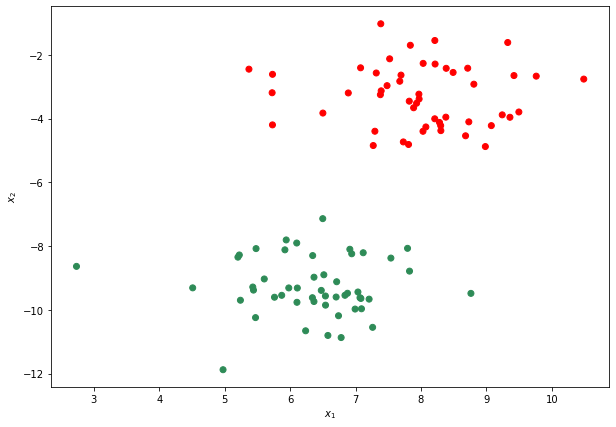

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# load synthetic data set
X, y = datasets.make_blobs(n_samples=100,
                          n_features=2,
                          centers=2,
                          random_state=6)

fig, ax = plt.subplots(figsize=(10,7))
cmap_dp = mcolors.ListedColormap(['red', 'seagreen'])
_ = ax.scatter(X[:,0], X[:,1], c = y, cmap=cmap_dp)
_ = ax.set(xlabel=r'$x_1$', ylabel=r'$x_2$')

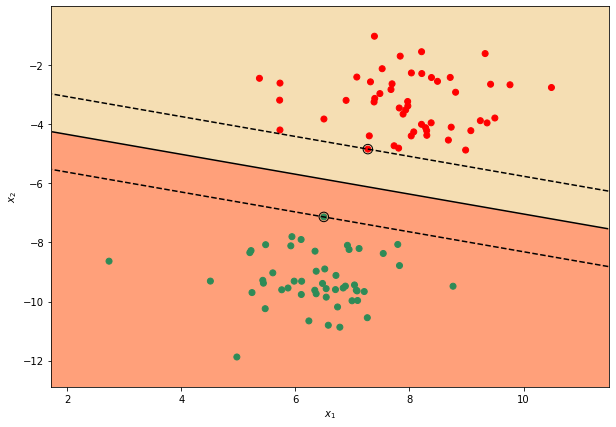

In [3]:
from sklearn.svm import SVC
import matplotlib.colors as mcolors

clf = SVC(kernel='linear',
         C=1e10,
         max_iter = 10_000)
clf.fit(X,y)

cmap_dp = mcolors.ListedColormap(['red', 'seagreen'])
cmap_boundary = mcolors.ListedColormap(['lightsalmon', 'wheat'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))
X_new = np.c_[xx.ravel(), yy.ravel()]
Z = clf.decision_function(X_new).reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,7))
ax.pcolormesh(xx, yy, Z<0, cmap=cmap_boundary, shading='auto')
_ = ax.scatter(X[:,0], X[:,1], c = y, cmap=cmap_dp)
_ = ax.set(xlabel=r'$x_1$', ylabel=r'$x_2$')

ax.contour(
        xx,
        yy,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-1, 0, 1],
    )

_ = ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=90,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )



### Kernel Trick
Kernel Trick is used if two classes are not linearly separable. The data points are tranformed into another feature space so that the classes are linearly separable.

Well-known <i>Kernels</i> are:
1. Linear Kernel
$$k_{linear}(x_i, x_j) = x_i^Tx_j$$

2. Polynomial-Kernel
$$ k_{poly}(x_i, x_j) = (X_i^Tx_j + c)^d$$

3. Radial Basis Function Kernel
$$ k_{rbf}(x_i, x_j) = exp \left( - \frac{||x_i - x_j||^2}{2\sigma^2}\right) = exp(-\gamma||x_i - x_j||^2$$

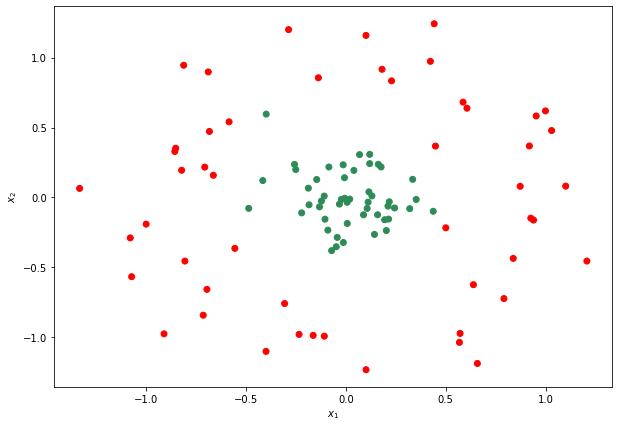

In [4]:
# create synthetic dataset that are not linearly separable

X, y = datasets.make_circles(n_samples=100, 
                            noise=0.2, 
                            random_state=4, 
                            factor=0.01)

fig, ax = plt.subplots(figsize=(10,7))
cmap_dp = mcolors.ListedColormap(['red', 'seagreen'])
_ = ax.scatter(X[:,0], X[:,1], c = y, cmap=cmap_dp)
_ = ax.set(xlabel=r'$x_1$', ylabel=r'$x_2$')

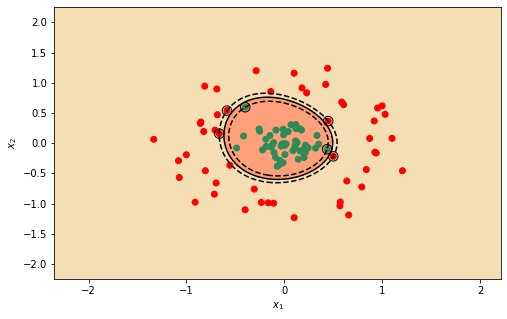

In [5]:
clf = SVC(kernel="rbf", C=1e10, gamma="auto")
clf.fit(X, y)

cmap_dp = mcolors.ListedColormap(['red', 'seagreen'])
cmap_boundary = mcolors.ListedColormap(['lightsalmon', 'wheat'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))
X_new = np.c_[xx.ravel(), yy.ravel()]
Z = clf.decision_function(X_new).reshape(xx.shape)

fig, ax = plt.subplots(figsize=(8,5))
ax.pcolormesh(xx, yy, Z<0, cmap=cmap_boundary, shading='auto')
_ = ax.scatter(X[:,0], X[:,1], c = y, cmap=cmap_dp)
_ = ax.set(xlabel=r'$x_1$', ylabel=r'$x_2$')

ax.contour(
        xx,
        yy,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-1, 0, 1],
    )

_ = ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=90,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )

### Regularization
SVM Optimization always tries to find the data points that defines the margin. Its not always the best approach, because data set can be noisy. Its a good idea to allow some data points inside the margin area. These data points which lie inside the margin area are called <i>Slack Variable</i>.

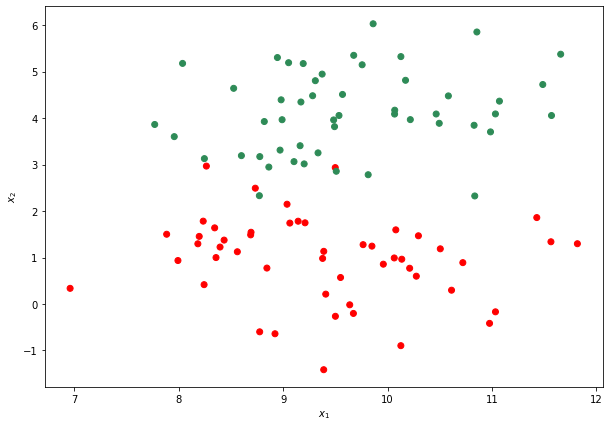

In [12]:
# load synthetic data set
X, y = datasets.make_blobs(n_samples=100,
                          n_features=2,
                          centers=2,
                          random_state=4)

fig, ax = plt.subplots(figsize=(10,7))
cmap_dp = mcolors.ListedColormap(['red', 'seagreen'])
_ = ax.scatter(X[:,0], X[:,1], c = y, cmap=cmap_dp)
_ = ax.set(xlabel=r'$x_1$', ylabel=r'$x_2$')

C:\Users\shres\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


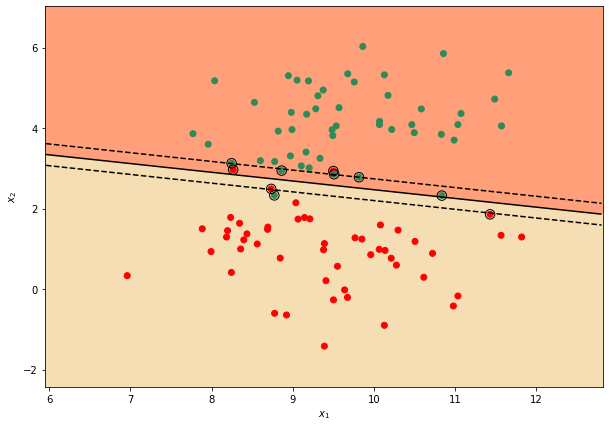

In [15]:
clf = SVC(kernel='linear',
         C=500,
         max_iter = 10_000)
clf.fit(X,y)

cmap_dp = mcolors.ListedColormap(['red', 'seagreen'])
cmap_boundary = mcolors.ListedColormap(['lightsalmon', 'wheat'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.03), np.arange(y_min, y_max, 0.03))
X_new = np.c_[xx.ravel(), yy.ravel()]
Z = clf.decision_function(X_new).reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,7))
ax.pcolormesh(xx, yy, Z<0, cmap=cmap_boundary, shading='auto')
_ = ax.scatter(X[:,0], X[:,1], c = y, cmap=cmap_dp)
_ = ax.set(xlabel=r'$x_1$', ylabel=r'$x_2$')

ax.contour(
        xx,
        yy,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-1, 0, 1],
    )

_ = ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=90,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )